# Invert & Model Power Spectra

Model and Invert the Power Spectra for visualization and Fitting

## Dependencies

In [2]:
import os, stat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import imp

#import utils.run_analysis as ana

import stftoolkit as stf
import datatable as dt

import imageio
import cv2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gsp
import matplotlib.colors as colors

import imageio

## Parameters

*** NOTE: REALLY NEED TO CHECK ON THE VALUES FOR HORIZONTAL AND VERTICAL FOV ***

In [7]:
base_dir = '/hmet_data/'
data_dir = os.path.join(base_dir, 'analysis')
output_dir = os.path.join(base_dir, './ps_output')

means_dir = './output/ago_pilot'

fps = 200

###DEFINITELY NEED TO CHECK ON THESE VALUES
horizontal_fov_deg = 61
#vertical_fov_deg = 61

img_dims=(1544,2064)

chunk_secs = 2
chunk_pix = 512
num_chunks = 100

## Load in Power Spectra

In [8]:
world_ps_all_3d_grandmean = np.load(os.path.join(means_dir,f'Mean3dAllPowerSpec_world.npy'))
head_ps_all_3d_grandmean = np.load(os.path.join(means_dir,f'Mean3dAllPowerSpec_head.npy'))
retinal_ps_all_3d_grandmean = np.load(os.path.join(means_dir,f'Mean3dAllPowerSpec_retinal.npy'))
fqs_space = np.load(os.path.join(means_dir,f'MeanFqsSpace.npy'))
fqs_time = np.load(os.path.join(means_dir,f'MeanFqsTime.npy'))
print(f'PS Size: {world_ps_all_3d_grandmean.shape}')

PS Size: (400, 512, 512)


## Invert Power Spectra with random Phase

In [10]:
def invert_ps_3d(ps3d):
    '''Invert a 3d power spectrum, adding random phase, to make an image sequence'''
    rand_phase = np.random.rand(*ps3d.shape)*2*np.pi - np.pi
    ampspec = np.sqrt(ps3d)*np.exp(1j*rand_phase)
    mov = np.real(np.fft.ifftn(np.fft.ifftshift(ampspec)))
    #remap to [0,1]
    mov = mov - np.min(mov)
    mov = mov/np.max(mov)
    return mov

world_movie = invert_ps_3d(world_ps_all_3d_grandmean)
head_movie = invert_ps_3d(head_ps_all_3d_grandmean)
retinal_movie = invert_ps_3d(retinal_ps_all_3d_grandmean)

Text(0.5, 1.0, 'Movie Size (400, 512, 512)')

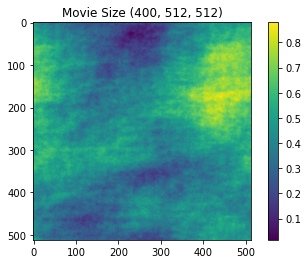

In [13]:
plt.imshow(world_movie[0])
plt.colorbar()
plt.title(f'Movie Size {world_movie.shape}')

In [14]:
def write_video_cv2(np_video, outfilename, fps=200):
    
    #remap to [0,255]
    np_video = np_video - np.min(np_video)
    np_video = np_video/np.max(np_video)
    np_video = (np_video*255).astype('uint8')
    
    frameshape = np.shape(np_video[:,:,0])
    print(frameshape)
    out = cv2.VideoWriter(outfilename, cv2.VideoWriter_fourcc(*'MP4V'), fps, frameshape)
    #out = cv2.VideoWriter(outfilename, cv2.VideoWriter_fourcc(*'XVID'), fps, frameshape)
    for frame in np_video:
        out.write(frame)
    out.release()


#write_video_cv2(world_movie, f'./output/world_fourier_noise_movie.mp4', fps=200)
imageio.mimwrite(os.path.join(means_dir,'world_fourier_noise_movie.mp4'), (world_movie*255).astype('uint8'), fps=200)
imageio.mimwrite(os.path.join(means_dir,'head_fourier_noise_movie.mp4'), (head_movie*255).astype('uint8'), fps=200)
imageio.mimwrite(os.path.join(means_dir,'retinal_fourier_noise_movie.mp4'), (retinal_movie*255).astype('uint8'), fps=200)